# SpaceX Falcon 9 Landing Prediction

## Exploratory Data Analysis with Data Visualization

In this notebook, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

## Objectives

Perform Exploratory Data Analysis (EDA) and Feature Engineering using Pandas and Matplotlib

1. Exploratory Data Analysis (EDA)
2. Preparing Data Feature Engineering

## Import Libraries and Define Auxiliary Functions

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
# Load Space X dataset

data = pd.read_csv('dataset_part_2.csv')
data.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


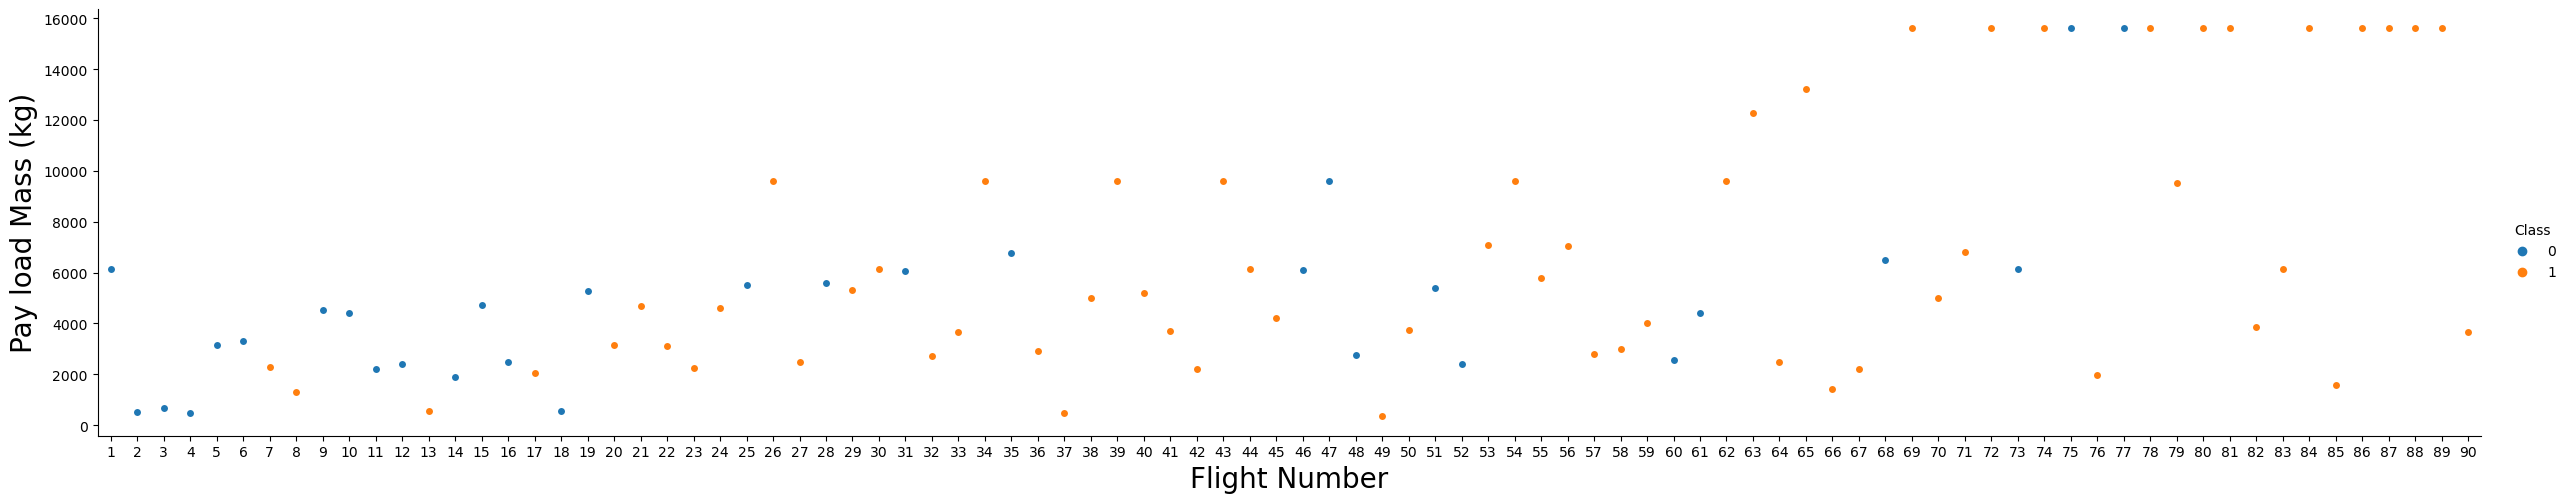

In [3]:
# Plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch

sns.catplot(y = "PayloadMass", x = "FlightNumber", hue = "Class", data = data, aspect = 5)
plt.xlabel("Flight Number",fontsize = 20)
plt.ylabel("Pay load Mass (kg)",fontsize = 20)
plt.show()

## Task 1: Visualize the relationship between Flight Number and Launch Site

/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


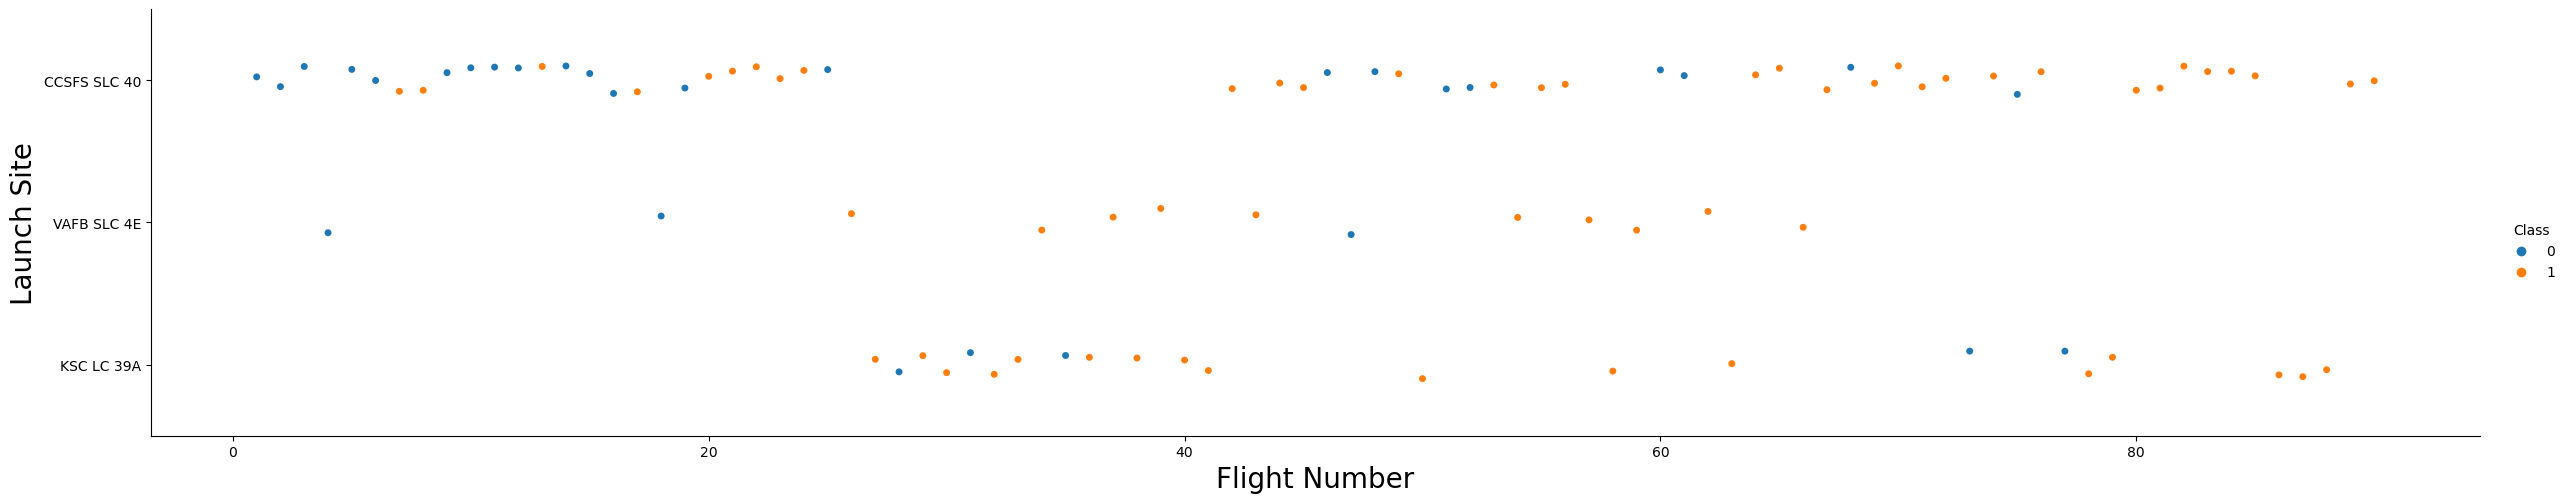

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot(x = 'FlightNumber', y = 'LaunchSite', hue = 'Class', data = data, aspect = 5)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Launch Site', fontsize = 20)
plt.show()

Explanation:

1. The earliest flights all failed while the latest flights all succeeded
2. The CCAFS SLC 40 launch site has about a half of all launches
3. VAFB SLC 4E and KSC LC 39A have higher success rates
4. It can be assumed that each new launch has a higher rate of success

## Task 2: Visualize the relationship between Payload and Launch Site

/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


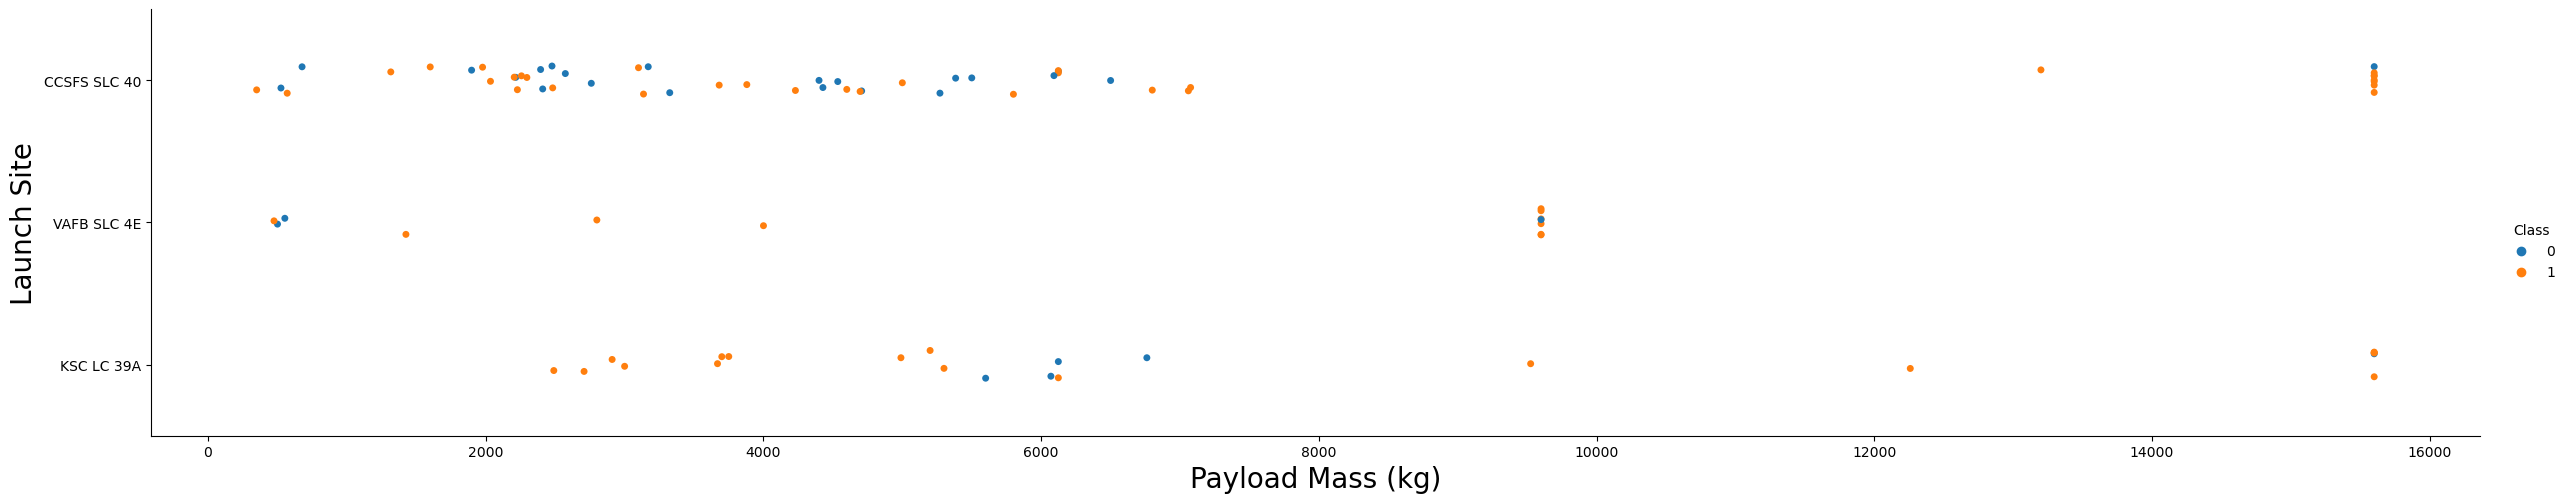

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(x = 'PayloadMass', y = 'LaunchSite', hue = 'Class', data = data, aspect = 5)
plt.xlabel('Payload Mass (kg)',fontsize = 20)
plt.ylabel('Launch Site',fontsize = 20)
plt.show()

Explanation:

1. For every launch site the higher the payload mass, the higher the success rate
2. Most of the launches with payload mass over 7000 kg were successfull
3. KSC LC 39A has a 100% success rate for payload mass under 5500 kg too

## Task 3: Visualize the relationship between success rate of each orbit type

/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


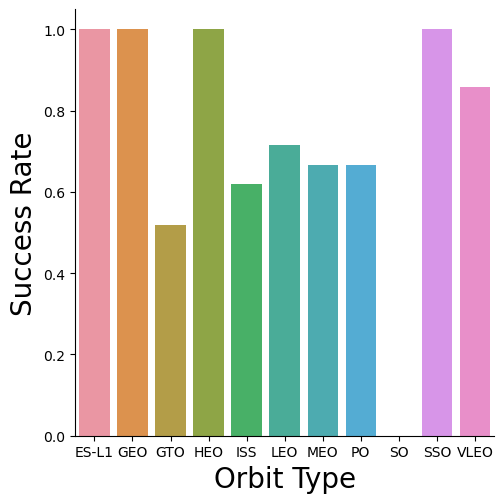

In [6]:
# Use groupby method on Orbit column and get the mean of Class column

sns.catplot(x = 'Orbit', y = 'Class', data = data.groupby('Orbit')['Class'].mean().reset_index(), kind = 'bar')
plt.xlabel('Orbit Type',fontsize = 20)
plt.ylabel('Success Rate',fontsize = 20)
plt.show()

Explanation:

1. Orbit with 100% success rate are: ES-L1, GEO, HEO, and SSO
2. Orbits with 0% success rate are: SO
3. Orbits with success rate between 50% and 85%: GTO, ISS, LEO, MEO, and PO

## Task 4: Visualize the relationship between Flight Number and Orbit type

/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


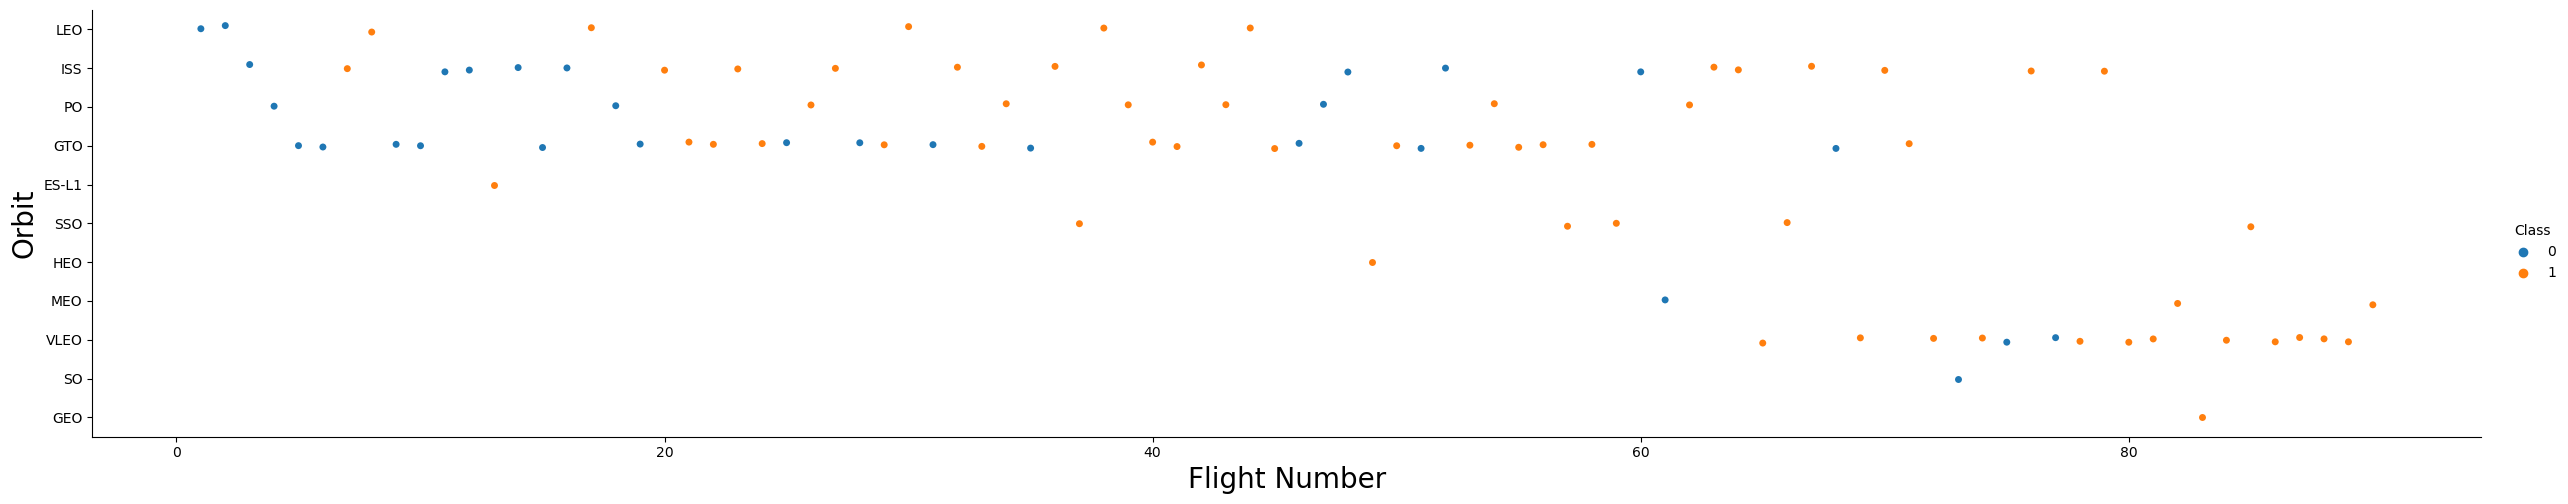

In [7]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.catplot(x = 'FlightNumber', y = 'Orbit', hue = 'Class', data = data, aspect = 5)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

The LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit

## Task 5: Visualize the relationship between Payload and Orbit type

/Users/zaedyussof/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


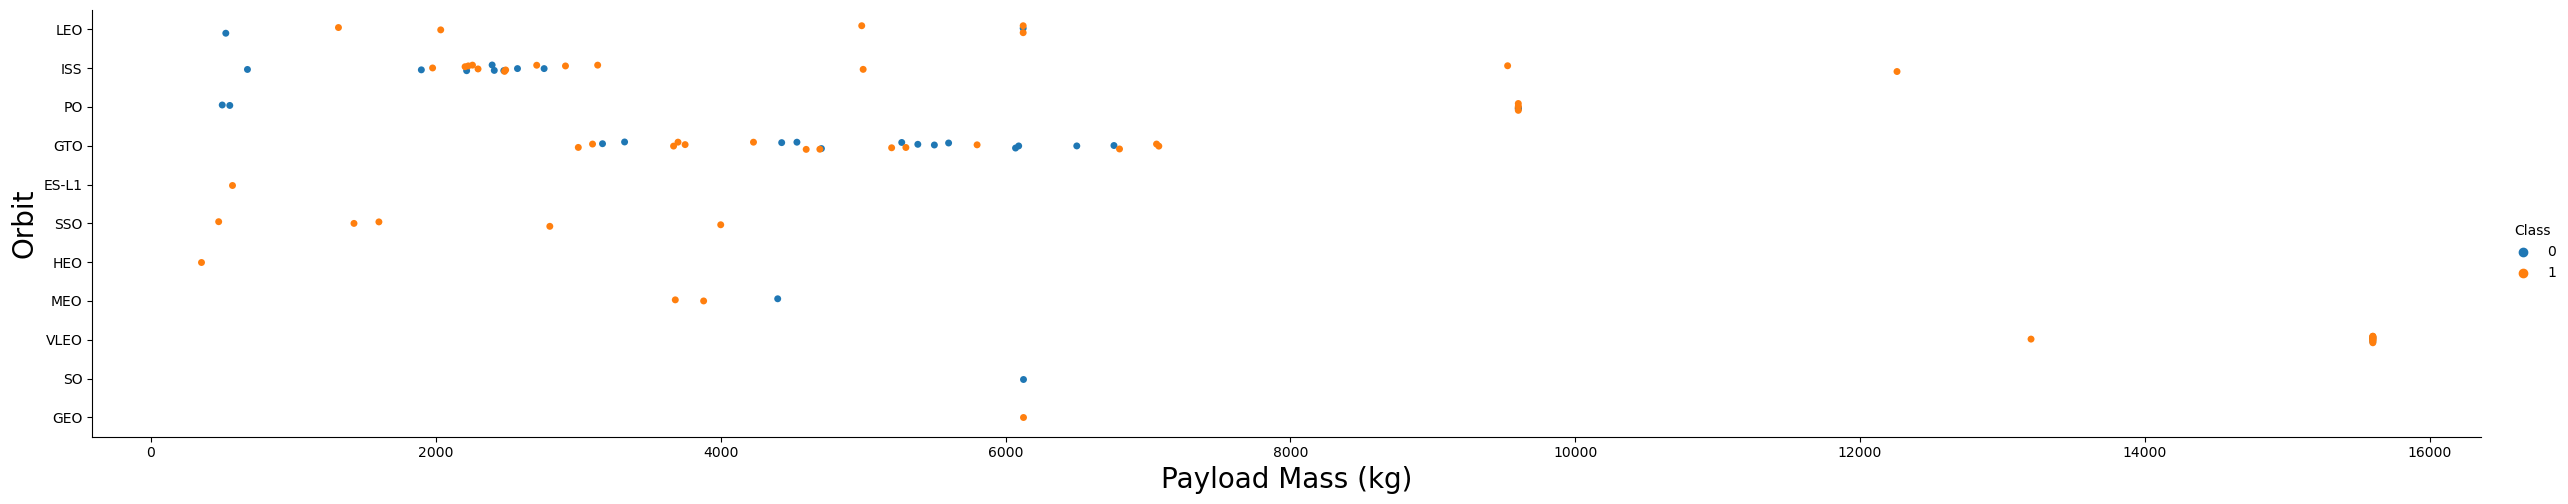

In [8]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot(x = 'PayloadMass', y = 'Orbit', hue = 'Class', data = data, aspect = 5)
plt.xlabel('Payload Mass (kg)', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

Observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits

## Task 6: Visualize the launch success yearly trend

In [9]:
# Function to Extract years from the date 

year=[]
def Extract_year(date):
    for i in data["Date"]:
        year.append(i.split("-")[0])
    return year

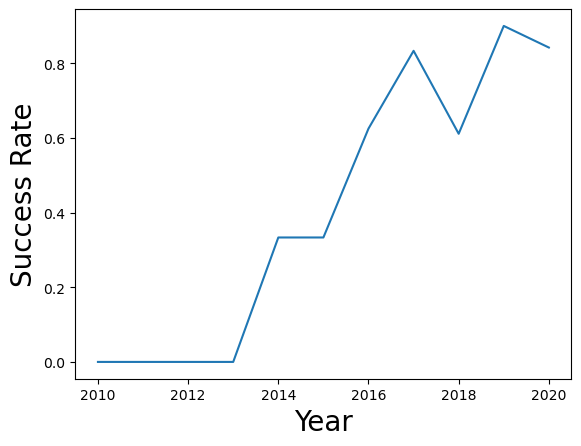

In [10]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

data['Year'] = pd.to_datetime(data['Date']).dt.year
years = data.groupby('Year')['Class'].mean()

sns.lineplot(x = years.index, y = years)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Success Rate', fontsize = 20)
plt.show()

Observe that the success rate since 2013 kept increasing till 2020

## Features Engineering

By now, we should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [11]:
features = data[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(5)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## Task 7: Create dummy variables to categorical columns

In [12]:
# Use get_dummies() function on the categorical columns

features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Task 8: Cast all numerical columns to float64

In [13]:
# Use astype function

features_one_hot.astype('float64')

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Export dataframe to CSV file

features_one_hot.to_csv('dataset_part_3.csv', index = False)

## -END-